In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('dataset/Algerian_forest_fires_dataset_UPDATE.csv',header=1)
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


## Checking on dataset

In [5]:
# check shape 
df.shape

(246, 14)

In [6]:
# duplcate rows
df.duplicated().sum()

0

In [7]:
# check null values
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

# add a new feture which divide this data set into two part 
1. bajaia Region 
2. Sidi-Bel Abbes Region

In [8]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [9]:
df.dropna(inplace=True)
df.isnull().sum() # missing values are removed

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [10]:
 df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1.0


In [11]:
df.columns = df.columns.str.strip() # strip white spaces from features name

In [12]:
df = df.drop(123).reset_index(drop=True)

In [13]:
df.iloc[[123]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
123,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0


In [14]:
df[['day','month','year','Temperature','RH','Ws','Region']]=df[['day','month','year','Temperature','RH','Ws','Region']].astype(int)
df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] =  df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] .astype(float)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


## insights
1. No duplicate values present
2. some null values present which is remove from dataset
3. numerical data convert into integer and float valure according to thier nature

In [16]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [17]:
df['Classes'].value_counts() # here some white space are in the rows data

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [18]:
df['Classes'] = df['Classes'].str.strip()  # remove white spaces 

In [19]:
for i, val in enumerate(df['Classes']):
    if val == 'not fire':
        df['Classes'].at[i] = 0
    else:
        df['Classes'].at[i] = 1

In [20]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [21]:
# drop day year nad month column. They are not  import for ML Model traning
df.drop(columns=['day','month','year'],axis=1,inplace=True)

In [29]:
# save cleared data into csv file
df.to_csv('dataset/Algerian_forest_fires_dataset_clean.csv')

# Visualization using graphs

<Axes: title={'center': 'Buildup Index'}, xlabel='BUI', ylabel='Count'>

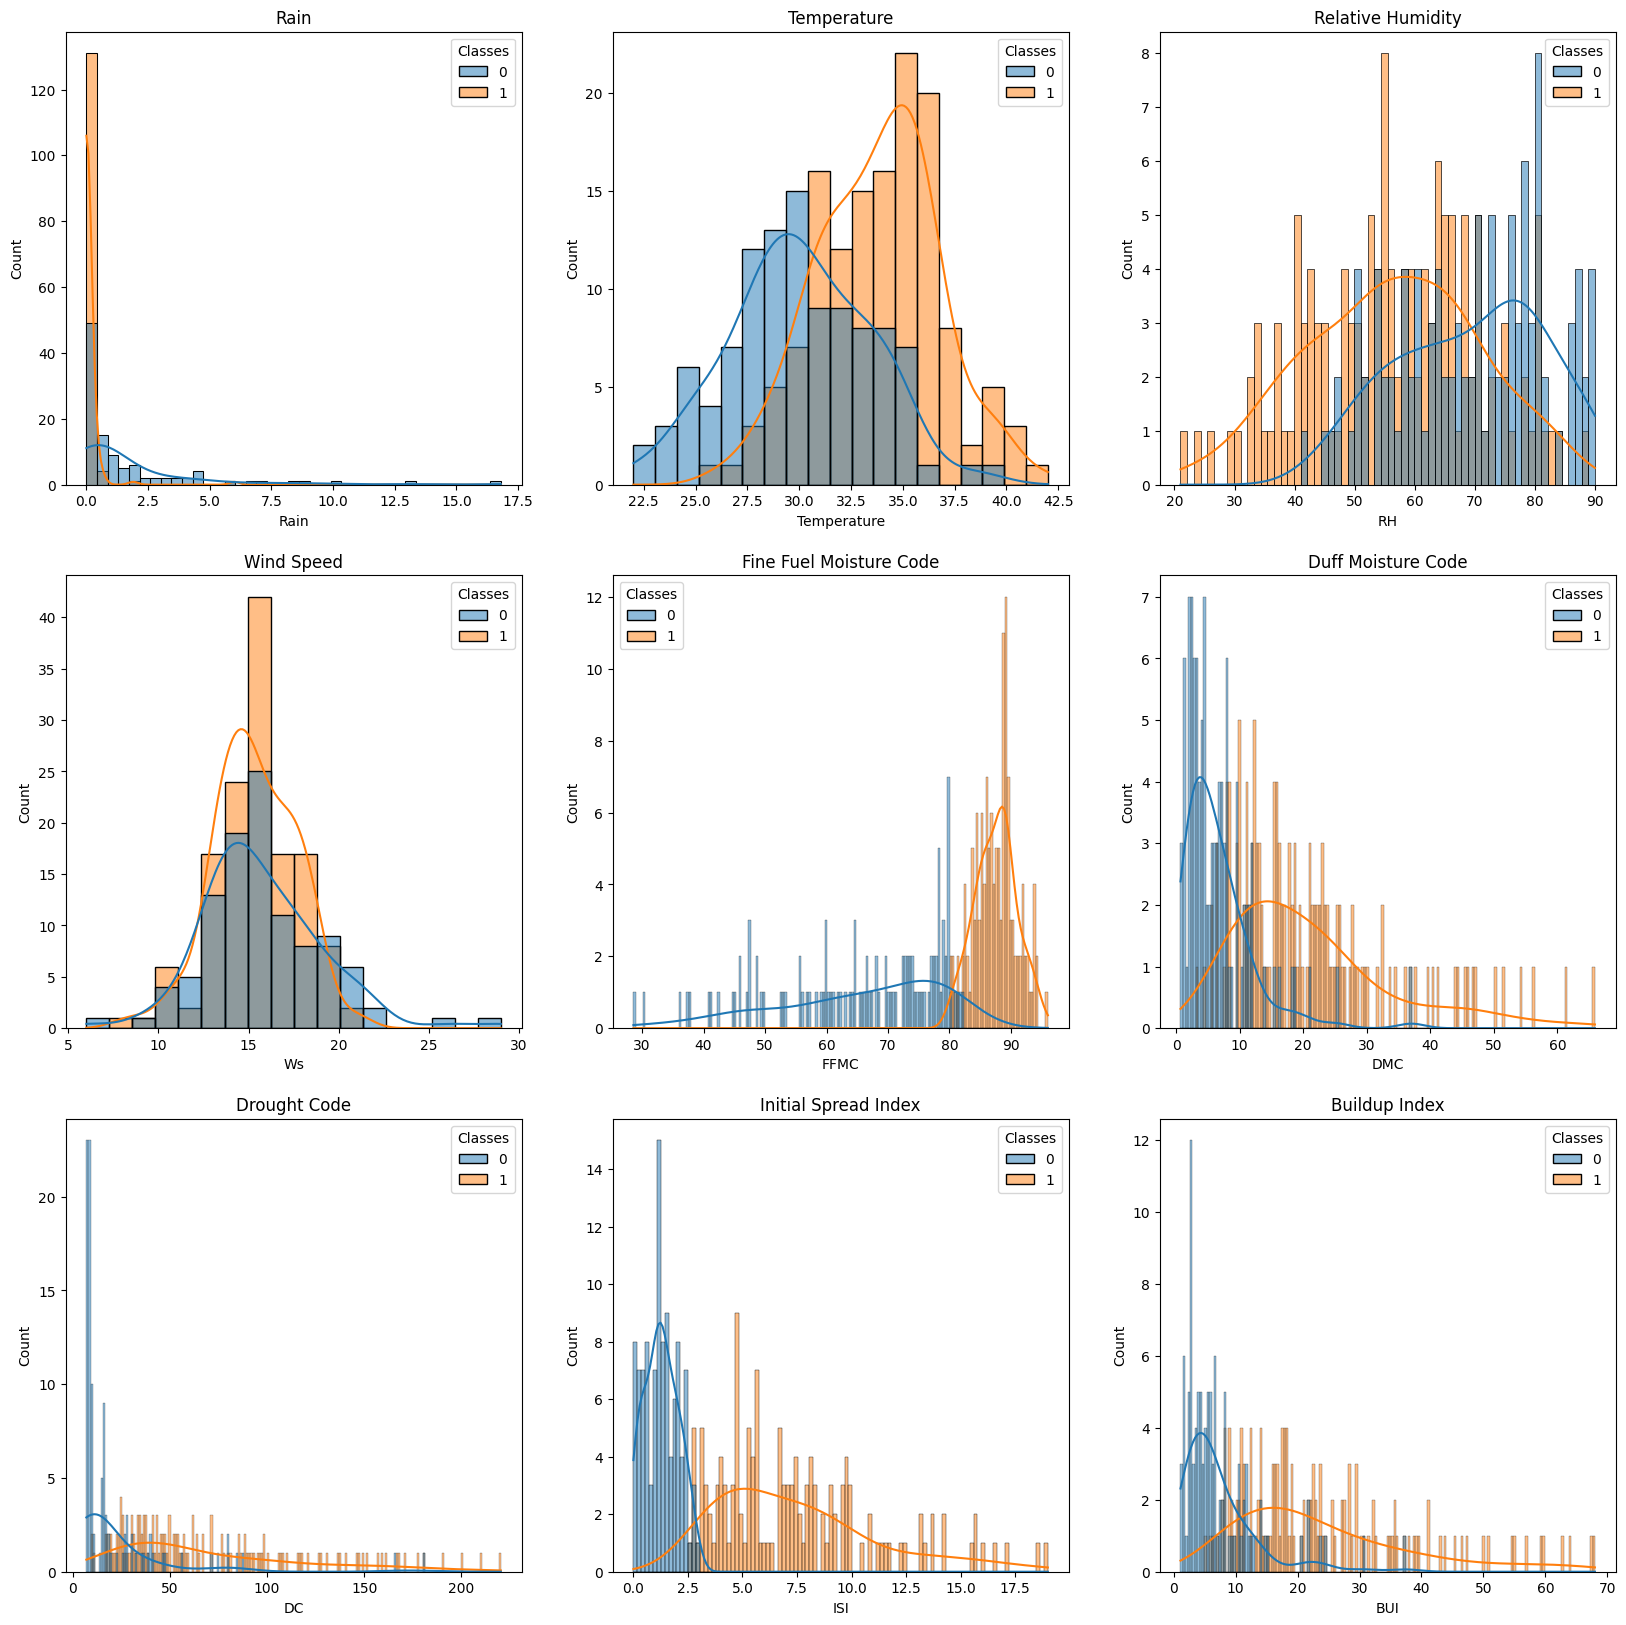

In [22]:
plt.subplots(3,3,figsize=(20,20))
plt.subplot(331)
plt.title('Rain')
sns.histplot(data=df,x='Rain',hue='Classes',kde=True,bins=df['Rain'].nunique())
plt.subplot(332)
plt.title('Temperature')
sns.histplot(data=df,x='Temperature',hue='Classes',kde=True,bins=df['Temperature'].nunique())
plt.subplot(333)
plt.title('Relative Humidity')
sns.histplot(data=df,x='RH',hue='Classes',kde=True,bins=df['RH'].nunique())
plt.subplot(334)
plt.title('Wind Speed')
sns.histplot(data=df,x='Ws',hue='Classes',kde=True,bins=df['Ws'].nunique())
plt.subplot(335)
plt.title('Fine Fuel Moisture Code')
sns.histplot(data=df,x='FFMC',hue='Classes',kde=True,bins=df['FFMC'].nunique())
plt.subplot(336)
plt.title('Duff Moisture Code')
sns.histplot(data=df,x='DMC',hue='Classes',kde=True,bins=df['DMC'].nunique())
plt.subplot(337)
plt.title('Drought Code')
sns.histplot(data=df,x='DC',hue='Classes',kde=True,bins=df['DC'].nunique())
plt.subplot(338)
plt.title('Initial Spread Index')
sns.histplot(data=df,x='ISI',hue='Classes',kde=True,bins=df['ISI'].nunique())
plt.subplot(339)
plt.title('Buildup Index')
sns.histplot(data=df,x='BUI',hue='Classes',kde=True,bins=df['BUI'].nunique())


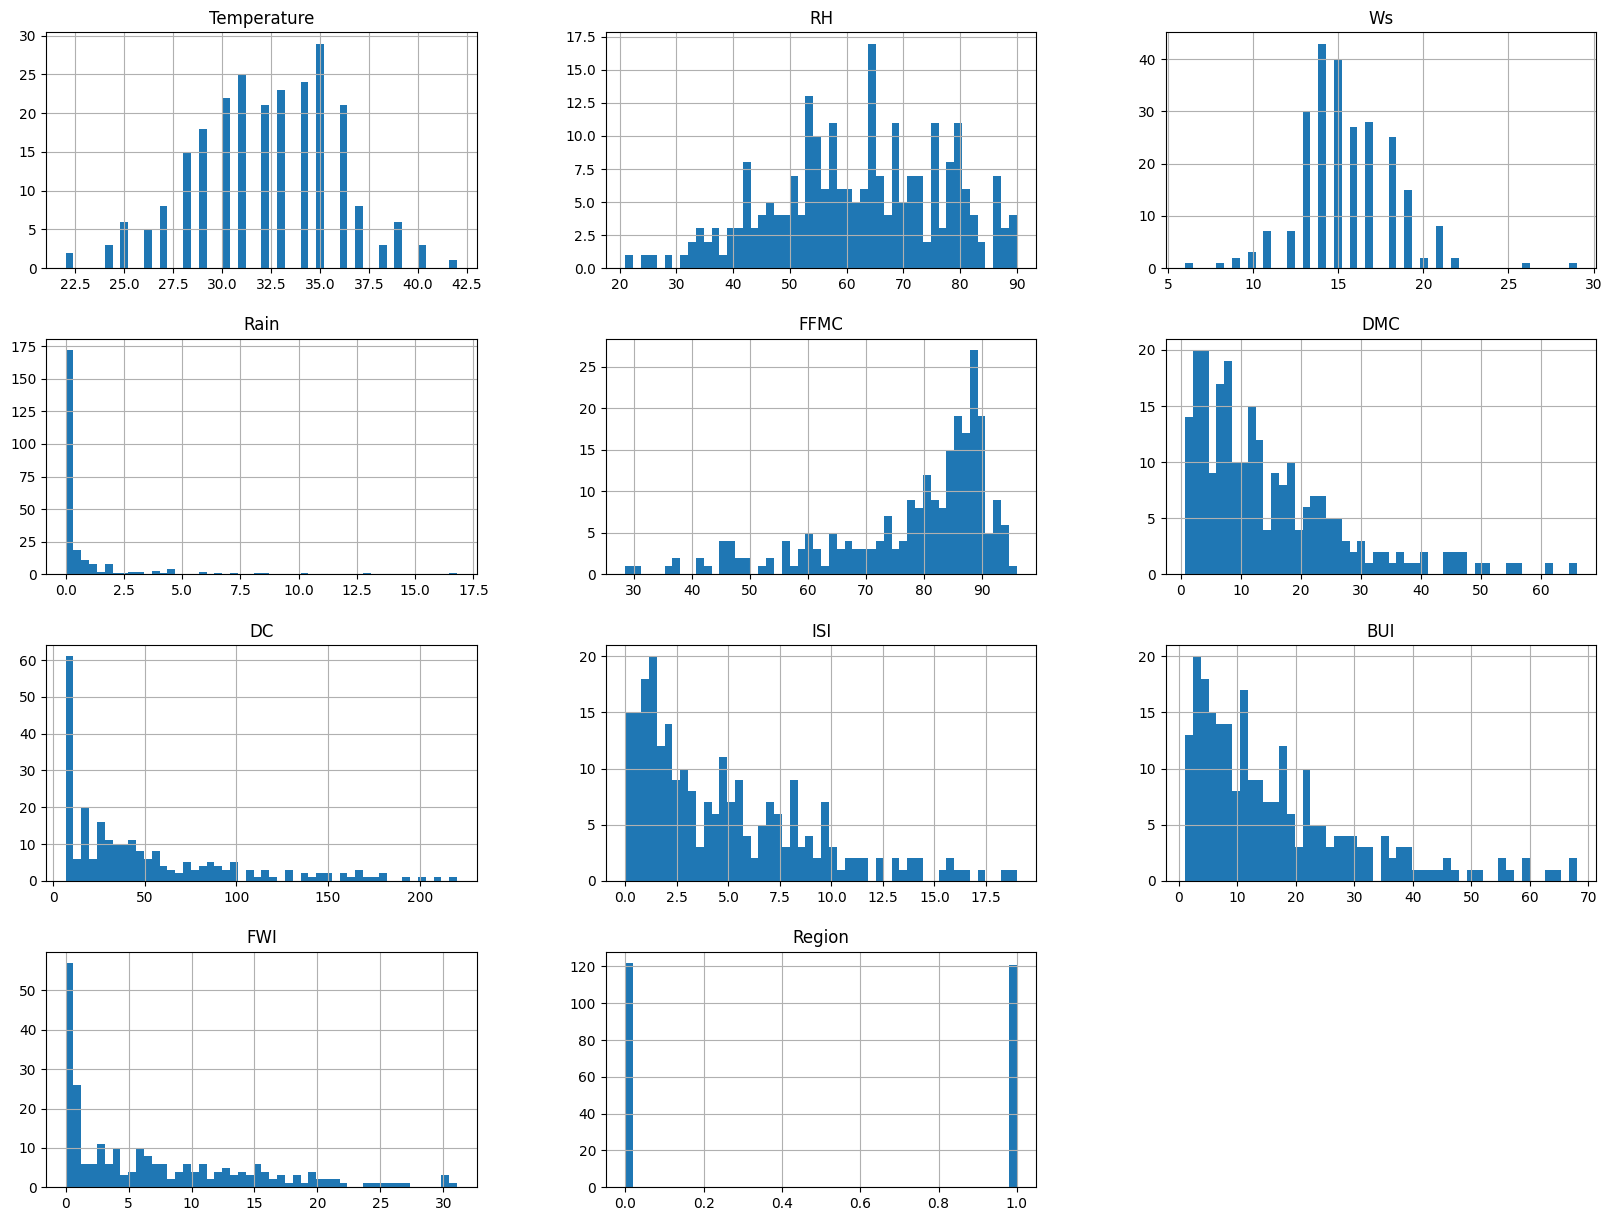

In [23]:
## Plot desnity plot for all features
df.hist(bins=50,figsize=(20,15))
plt.show()

In [47]:
notfire = df['Classes'].value_counts()[0]
fire = df['Classes'].value_counts()[1]
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f6096c44a50>,
 [Text(0.21895629591982635, 1.0779880057204114, 'not fire'),
  Text(-0.21895619499130464, -1.0779880262205745, 'fire')],
 [Text(0.11943070686535981, 0.5879934576656789, '43.6%'),
  Text(-0.11943065181343888, -0.587993468847586, '56.4%')])

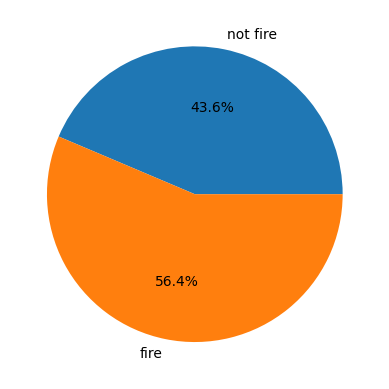

In [46]:
plt.pie(x=[notfire,fire],autopct="%1.1f%%",labels=['not fire','fire'])

<Axes: >

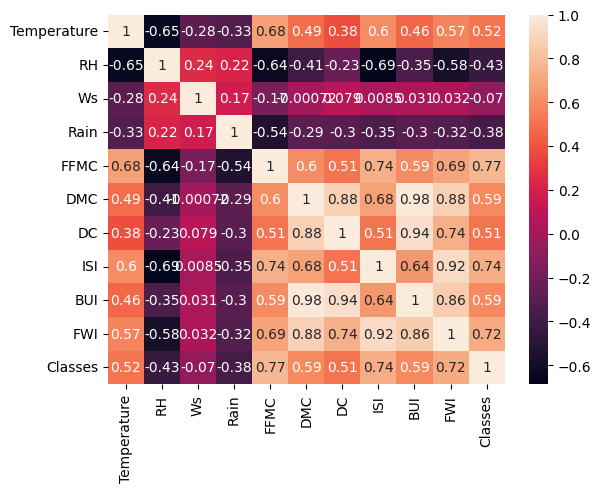

In [25]:
sns.heatmap(df.iloc[:,:-1].corr(),annot=True,)

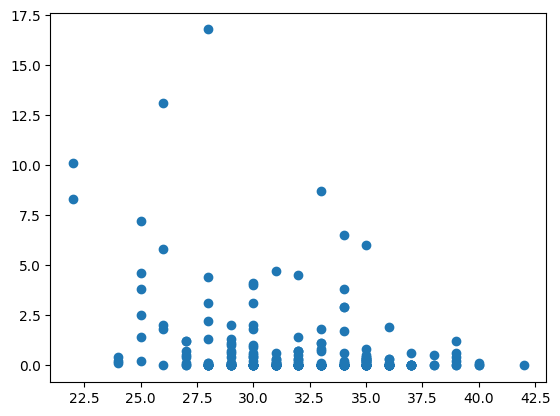

In [26]:
plt.scatter(data=df,x='Temperature',y='Rain')

In [27]:
df.iloc[:,:-1]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0
...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0


## model Training

In [48]:
# define dependent and inpendent variables
x = df.drop(columns=['FWI'],axis=1)
y = df['FWI']
x.shape,y.shape

((243, 11), (243,))

In [50]:
# splite data into train and test data
from sklearn.model_selection import train_test_split

In [53]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((182, 11), (182,), (61, 11), (61,))

In [56]:
## scale down and standardzation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [59]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

<Axes: >

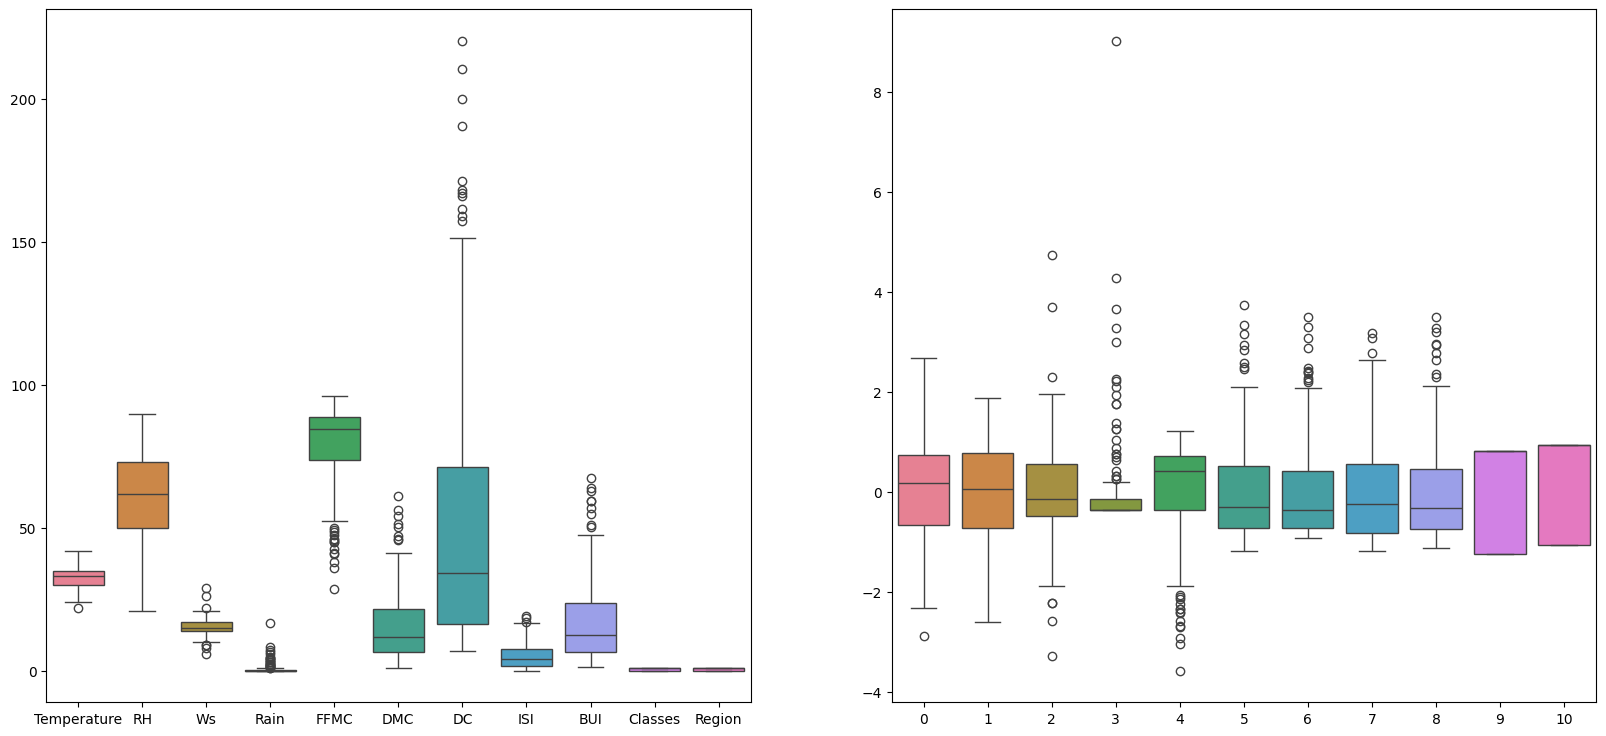

In [67]:
# box plot 
plt.subplots(1,2,figsize=(20,9))
plt.subplot(121)
sns.boxplot(x_train,)
plt.subplot(122)
sns.boxplot(x_train_scaled)


 box plot shows normilazation reduce rand of data and scale down it which is shown in graph

# model trianning

In [72]:
# LinearRegretion
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
lineRegr = LinearRegression()
lineRegr.fit(x_train_scaled,y_train)
y_test_predict = lineRegr.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_test_predict))
print(r2_score(y_test,y_test_predict))

0.6049757474963279
0.9813587165331935


In [78]:
# Ridge Regretion
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(x_train_scaled,y_train)
y_test_predict = ridge.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_test_predict))
print(r2_score(y_test,y_test_predict))

0.6037152008658577
0.9809502185846475


In [81]:
# Lasso Regretion
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(x_train_scaled,y_train)
y_test_predict = lasso.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_test_predict))
print(r2_score(y_test,y_test_predict))

1.0622145996005576
0.9530297935651557


In [82]:
# ElasticNet Regretion
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_test_predict = elasticnet.predict(x_test_scaled)
print(mean_absolute_error(y_test,y_test_predict))
print(r2_score(y_test,y_test_predict))

1.4462018829215793
0.9137904006780591


# model selection
 Here we choose Ridge LinearRegretion algorithem  because it prevent to over fitting condition

In [83]:
# save model into pikal file
import pickle

pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))